GT(_tbl_data=shape: (14, 7)
┌──────────────┬──────────────┬─────────────┬─────────────┬─────────────┬────────────┬─────────────┐
│ icon         ┆ product      ┆ revenue_dol ┆ revenue_pct ┆ profit_doll ┆ profit_pct ┆ monthly_sal │
│ ---          ┆ ---          ┆ lars        ┆ ---         ┆ ars         ┆ ---        ┆ es          │
│ str          ┆ str          ┆ ---         ┆ f64         ┆ ---         ┆ f64        ┆ ---         │
│              ┆              ┆ f64         ┆             ┆ f64         ┆            ┆ list[i64]   │
╞══════════════╪══════════════╪═════════════╪═════════════╪═════════════╪════════════╪═════════════╡
│ grinder.png  ┆ Grinder      ┆ 904500.0    ┆ 0.03        ┆ 567960.0    ┆ 0.04       ┆ [521, 494,  │
│              ┆              ┆             ┆             ┆             ┆            ┆ … 751]      │
│ moka-pot.png ┆ Moka pot     ┆ 2.04525e6   ┆ 0.07        ┆ 181080.0    ┆ 0.01       ┆ [4726,      │
│              ┆              ┆             ┆             ┆             ┆            ┆ 4741, …     │
│              ┆              ┆             ┆             ┆             ┆            ┆ 6283]       │
│ cold-brew.pn ┆ Cold brew    ┆ 288750.0    ┆ 0.01        ┆ 241770.0    ┆ 0.02       ┆ [244, 249,  │
│ g            ┆              ┆             ┆             ┆             ┆            ┆ … 244]      │
│ filter.png   ┆ Filter       ┆ 404250.0    ┆ 0.01        ┆ 70010.0     ┆ 0.0        ┆ [2067,      │
│              ┆              ┆             ┆             ┆             ┆            ┆ 1809, …     │
│              ┆              ┆             ┆             ┆             ┆            ┆ 2744]       │
│ drip-machine ┆ Drip machine ┆ 2.632e6     ┆ 0.09        ┆ 1.37445e6   ┆ 0.09       ┆ [2137,      │
│ .png         ┆              ┆             ┆             ┆             ┆            ┆ 1623, …     │
│              ┆              ┆             ┆             ┆             ┆            ┆ 2328]       │
│ …            ┆ …            ┆ …           ┆ …           ┆ …           ┆ …          ┆ …           │
│ chemex.png   ┆ Chemex       ┆ 3.13725e6   ┆ 0.11        ┆ 817680.0    ┆ 0.06       ┆ [4938,      │
│              ┆              ┆             ┆             ┆             ┆            ┆ 4167, …     │
│              ┆              ┆             ┆             ┆             ┆            ┆ 7220]       │
│ scale.png    ┆ Scale        ┆ 3.801e6     ┆ 0.13        ┆ 2.91029e6   ┆ 0.2        ┆ [1542,      │
│              ┆              ┆             ┆             ┆             ┆            ┆ 1566, …     │
│              ┆              ┆             ┆             ┆             ┆            ┆ 3180]       │
│ kettle.png   ┆ Kettle       ┆ 756250.0    ┆ 0.03        ┆ 617520.0    ┆ 0.04       ┆ [1139,      │
│              ┆              ┆             ┆             ┆             ┆            ┆ 1023, …     │
│              ┆              ┆             ┆             ┆             ┆            ┆ 1529]       │
│ espresso-mac ┆ Espresso     ┆ 8.406e6     ┆ 0.29        ┆ 3.63644e6   ┆ 0.25       ┆ [686, 840,  │
│ hine.png     ┆ Machine      ┆             ┆             ┆             ┆            ┆ … 2577]     │
│ null         ┆ Total        ┆ 2.94485e7   ┆ 1.02        ┆ 1.479315e7  ┆ 1.0        ┆ null        │
└──────────────┴──────────────┴─────────────┴─────────────┴─────────────┴────────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x118abf9d0>, _boxhead=Boxhead([ColInfo(var='icon', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='product', type=<ColInfoTypeEnum.default: 1>, column_label='Product', column_align='left', column_width=None), ColInfo(var='revenue_dollars', type=<ColInfoTypeEnum.default: 1>, column_label='Amount', column_align='right', column_width=None), ColInfo(var='revenue_pct', type=<ColInfoTypeEnum.default: 1>, column_label='Percent', column_align='right', column_width=None), ColInfo(var='profit_dollars', type=<ColInfoTypeEnum.default: 1>, co
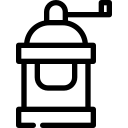
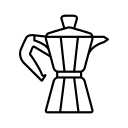
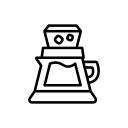
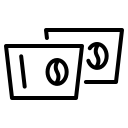
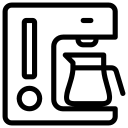
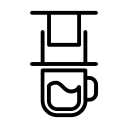
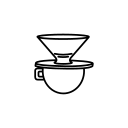
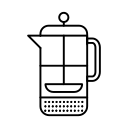
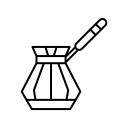
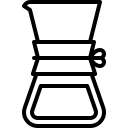
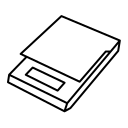
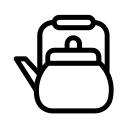
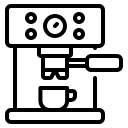

In [1]:
import polars as pl
import polars.selectors as cs
from great_tables import GT, loc, style

coffee_sales = pl.read_json("coffee-sales.json")

sel_rev = cs.starts_with("revenue")
sel_prof = cs.starts_with("profit")


coffee_table = (
    GT(coffee_sales)
    .tab_header("Sales of Coffee Equipment")
    .tab_spanner(label="Revenue", columns=sel_rev)
    .tab_spanner(label="Profit", columns=sel_prof)
    .cols_label(
        revenue_dollars="Amount",
        profit_dollars="Amount",
        revenue_pct="Percent",
        profit_pct="Percent",
        monthly_sales="Monthly Sales",
        icon="",
        product="Product",
    )
    # formatting ----
    .fmt_number(
        columns=cs.ends_with("dollars"),
        compact=True,
        pattern="${x}",
        n_sigfig=3,
    )
    .fmt_percent(columns=cs.ends_with("pct"), decimals=0)
    # style ----
    .tab_style(
        style=style.fill(color="aliceblue"),
        locations=loc.body(columns=sel_rev),
    )
    .tab_style(
        style=style.fill(color="papayawhip"),
        locations=loc.body(columns=sel_prof),
    )
    .tab_style(
        style=style.text(weight="bold"),
        locations=loc.body(rows=pl.col("product") == "Total"),
    )
    .fmt_nanoplot("monthly_sales", plot_type="bar")
    .fmt_image("icon", path="assets")
    .sub_missing(missing_text="")
)

coffee_table